In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

## Problem-Statement(Bank_data):

Attribute information For bank dataset

   Input variables:
   ### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   ### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   ### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [4]:
bank_data = pd.read_csv('bank-full.csv', sep = ';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
for col in bank_data:
    if bank_data[col].dtypes == 'object':
        print(f'{col} : {bank_data[col].unique()}')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


In [12]:
yes_no_col = ['default','housing','loan','y']
for col in yes_no_col:
    bank_data[col].replace({'yes': 1, 'no' :0}, inplace = True)

In [13]:
for col in bank_data:
    if bank_data[col].dtypes == 'object':
        print(f'{col} : {bank_data[col].unique()}')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']


#### One Hot Encoding

In [16]:
bank_data = pd.get_dummies(data = bank_data, columns = ['job','marital','education','contact', 'month','poutcome'], drop_first= True)
bank_data.shape

(45211, 43)

In [17]:
bank_data.sample(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
16718,43,0,0,1,0,24,229,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
25583,52,0,6286,0,0,19,288,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
33786,39,0,732,0,0,23,522,4,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
bank_data.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun     

#### Train Test split

In [19]:
X = bank_data.drop('y', axis = 1)
y = bank_data['y']
X.shape, y.shape

((45211, 42), (45211,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [24]:
X_train.shape, X_test.shape

((36168, 42), (9043, 42))

#### feature Scalling

In [26]:
scale = MinMaxScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

#### Logistic Regression

In [31]:
clr = LogisticRegression()
clr.fit(X_train_sc, y_train)
y_pred = clr.predict(X_test)

In [32]:
print(confusion_matrix(y_pred, y_test))

[[  39    0]
 [7946 1058]]


In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      1.00      0.01        39
           1       1.00      0.12      0.21      9004

    accuracy                           0.12      9043
   macro avg       0.50      0.56      0.11      9043
weighted avg       1.00      0.12      0.21      9043



#### Handling Imbalanced Dataset

In [38]:
y_train.value_counts()

0    31937
1     4231
Name: y, dtype: int64

In [40]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    31937
1    31937
Name: y, dtype: int64

In [41]:
clr = LogisticRegression()
clr.fit(X_train_sm, y_train_sm)
y_pred_sm = clr.predict(X_test)

print(confusion_matrix(y_pred_sm, y_test))
print(classification_report(y_pred_sm, y_test))

[[7083  392]
 [ 902  666]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7475
           1       0.63      0.42      0.51      1568

    accuracy                           0.86      9043
   macro avg       0.76      0.69      0.71      9043
weighted avg       0.84      0.86      0.85      9043



auc score is 0.7582638998216173


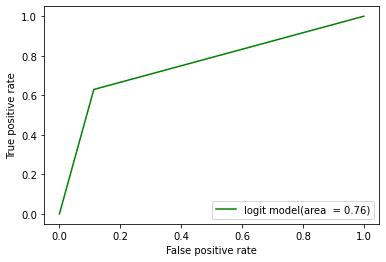

In [56]:
auc = roc_auc_score(y_test, y_pred_sm)
print('auc score is {}'.format(auc))



#ploting ROC - AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_sm)
plt.plot(fpr, tpr, color = 'green', label='logit model(area  = %0.2f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()